In [19]:
# 实现pca+knn，完成不同维数、不同k值下knn的性能分析

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
plt.style.use('ggplot')

number of instance:  1797
number of dimension:  64


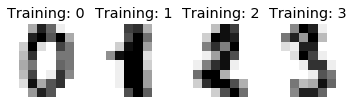

In [20]:
digits = datasets.load_digits()
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print('number of instance: ', data.shape[0])
print('number of dimension: ', data.shape[1])

未使用PCA降维的结果，knn搜索最优n

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=5, iid=True) #5折交叉验证
grid_search_knn.fit(X_train, y_train)
print('GridSearchCV交叉验证网格搜索字典获得的最好参数组合',grid_search_knn.best_params_)
print(' ')
print('GridSearchCV交叉验证网格搜索获得的最好估计器,在测试集上做交叉验证的平均得分',grid_search_knn.best_score_)#?????   
print(' ')
print('GridSearchCV交叉验证网格搜索获得的最好估计器,在测试集上的得分',grid_search_knn.score(X_test, y_test))

GridSearchCV交叉验证网格搜索字典获得的最好参数组合 {'n_neighbors': 3}
 
GridSearchCV交叉验证网格搜索获得的最好估计器,在测试集上做交叉验证的平均得分 0.9487750556792873
 
GridSearchCV交叉验证网格搜索获得的最好估计器,在测试集上的得分 0.9632925472747497


使用PCA,交叉验证网格搜索最优参数

In [50]:
#交叉验证网格搜索最优参数
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=5, iid=True) #5折交叉验证
n_components = [10,15,20,25,30,35,40]
scores = np.zeros(len(n_components))
best_n = np.zeros(len(n_components))
for i in range(len(n_components)):
    pca = PCA(n_components=n_components[i]).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    grid_search_knn.fit(X_train_pca, y_train)
    scores[i] = grid_search_knn.score(X_test_pca, y_test)
    best_n[i] = grid_search_knn.best_params_['n_neighbors']

In [51]:
scores,best_n

(array([0.93882091, 0.95328142, 0.96106785, 0.95773081, 0.96329255,
        0.9621802 , 0.9621802 ]), array([3., 5., 3., 5., 3., 3., 3.]))

pca: 30 n: 3.0 is the best score: 0.9632925472747497


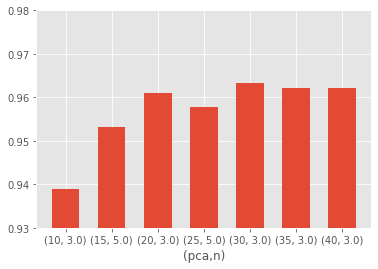

In [56]:
plt.xticks(n_components, zip(n_components,best_n))
plt.ylim(0.93, 0.98)
plt.bar(n_components,scores,width=3)
plt.xlabel('(pca,n)')
idx = np.where(scores==scores.max())[0][0]
print('pca:',n_components[idx],'n:',best_n[idx],'is the best score:',scores.max())

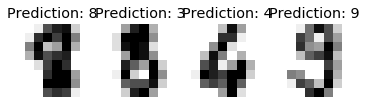

In [68]:
knn = KNeighborsClassifier(n_neighbors=int(best_n[idx]))
pca = PCA(n_components=n_components[idx]).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn.fit(X_train_pca, y_train)
predicted = knn.predict(X_test_pca)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
_, axes = plt.subplots(1, 4)
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)